In [34]:
import winsor_q1_network_characteristics_methods as winsor
import snap
import numpy as np
# %load_ext autoreload
# %autoreload 2
import matplotlib.pyplot as plt

# Problem 1.1 - Degree Distribution

Question: What is the key difference between degree distributions of the model graphs?



Answer: A key difference between the collaboration and random models
is the degree of the highly connected nodes. The collaboration network has nodes up to degree 80
wheras the random model nodes do not exceed degree 15.

In [35]:
# generate ErdosRenyi graph
graph_er = winsor.genErdosRenyi(N=5242, E=14484)

# generate Smallworld graph
graph_smallworld = winsor.genSmallWorld(N=5242, E=14484)

# load CollagNet graph
path = "ca-GrQc.txt"
graph_collabnet = winsor.loadCollabNet(path)

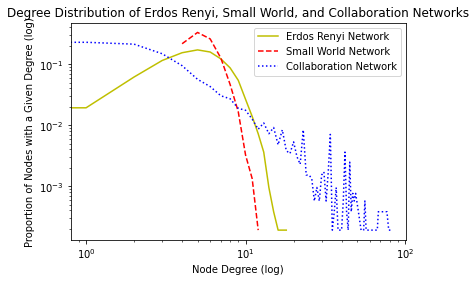

In [36]:
def Q1_1():
    """
    Code for HW1 Q1.1
    """


    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = winsor.genErdosRenyi(5242, 14484)
    smallWorld = winsor.genSmallWorld(5242, 14484)
    collabNet = winsor.loadCollabNet("ca-GrQc.txt")

    x_erdosRenyi, y_erdosRenyi = winsor.getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    x_smallWorld, y_smallWorld = winsor.getDataPointsToPlot(smallWorld)
    plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    x_collabNet, y_collabNet = winsor.getDataPointsToPlot(collabNet)
    plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    plt.xlabel('Node Degree (log)')
    plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.show()
    
# Execute code for Q1.1
Q1_1()

# Problem 1.2 - Excess Degree Distribution

Question: Show how to compute the excess degree distribution given only the degree distribution

(to be provided separately)

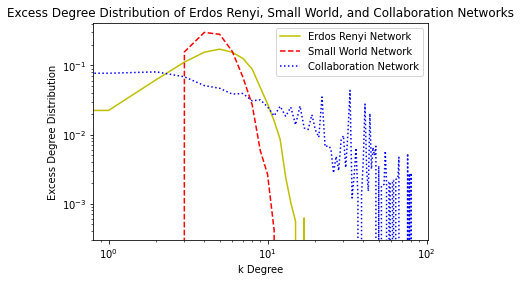

Expected Degree for Erdos Renyi: 5.526135
Expected Degree for Small World: 5.526135
Expected Degree for Collaboration Network: 5.526135
Expected Excess Degree for Erdos Renyi: 11.053853
Expected Excess Degree for Small World: 9.603977
Expected Excess Degree for Collaboration Network: 31.740817


In [37]:
# Find max degree of all 3 graphs for plotting (add 2 for padding)
maxdeg = max([erdosRenyi.GetNI((snap.GetMxDegNId(erdosRenyi))).GetDeg(),
                smallWorld.GetNI((snap.GetMxDegNId(smallWorld))).GetDeg(),
                collabNet.GetNI((snap.GetMxDegNId(collabNet))).GetDeg()]) + 2
                
def Q1_2_a():
    """
    Code for Q1.2a
    """
    qk_erdosRenyi = winsor.calcQk(erdosRenyi, maxdeg)
    qk_smallWorld = winsor.calcQk(smallWorld, maxdeg)
    qk_collabNet = winsor.calcQk(collabNet, maxdeg)

    plt.loglog(range(maxdeg), qk_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')
    plt.loglog(range(maxdeg), qk_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')
    plt.loglog(range(maxdeg), qk_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    plt.xlabel('k Degree')
    plt.ylabel('Excess Degree Distribution')
    plt.title('Excess Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    plt.legend()
    plt.show()

    # Calculate Expected Degree
    ed_erdosRenyi = winsor.calcExpectedDegree(erdosRenyi)
    ed_smallWorld = winsor.calcExpectedDegree(smallWorld)
    ed_collabNet = winsor.calcExpectedDegree(collabNet)
    print('Expected Degree for Erdos Renyi: %f' % ed_erdosRenyi)
    print('Expected Degree for Small World: %f' % ed_smallWorld)
    print('Expected Degree for Collaboration Network: %f' % ed_collabNet)

    # Calculate Expected Excess Degree
    eed_erdosRenyi = winsor.calcExpectedExcessDegree(erdosRenyi, qk_erdosRenyi)
    eed_smallWorld = winsor.calcExpectedExcessDegree(smallWorld, qk_smallWorld)
    eed_collabNet = winsor.calcExpectedExcessDegree(collabNet, qk_collabNet)
    print('Expected Excess Degree for Erdos Renyi: %f' % (eed_erdosRenyi))
    print('Expected Excess Degree for Small World: %f' % (eed_smallWorld))
    print('Expected Excess Degree for Collaboration Network: %f' % (eed_collabNet))


# Execute code for Q1.2a
Q1_2_a()

# Problem 1.3 - Clustering Coefficient

In [38]:
def Q1_3():
    """
    Code for Q1.3
    """
    C_erdosRenyi = winsor.calcClusteringCoefficient(erdosRenyi)
    C_smallWorld = winsor.calcClusteringCoefficient(smallWorld)
    C_collabNet = winsor.calcClusteringCoefficient(collabNet)
    
    print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
    print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
    print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)


# Execute code for Q1.3
Q1_3()

Clustering Coefficient for Erdos Renyi Network: 0.001438
Clustering Coefficient for Small World Network: 0.284050
Clustering Coefficient for Collaboration Network: 0.529636


Question:  Which network has the largest clusting coefficient and why?

Answer:    
The Collaboration Network has the highest clusting coefficient.  This reflects the non-random nature of relationships (edges) between people (nodes) in the real world vs the random relationships of the Erdos-Renyi and Small World models.  In the real world people associate with others based on (say) research topic.  These associations show up as a cluster in the real-world Collaboration Network.